<a href="https://colab.research.google.com/github/GraciousWeb/Pytorch/blob/main/cnn_cifar10_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [20]:

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [21]:
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

In [22]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [23]:
classes = ['plane', 'car', 'bird', 'deer', 'cat', 'dog', 'frog', 'horse', 'ship', 'truck'] #this is labeled 0-9 in CIFAR-10

<class 'torch.Tensor'>
frog


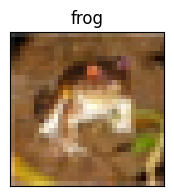

In [24]:
image, label = train_dataset[0] # gets the first image in the dataset
print(type(image))
print(classes[label]) #prints out the human-readable name of the image instead of the label(0-9)

plt.figure(figsize=(15, 2))
image, label = train_dataset[0]

unnorm = image * 0.5+0.5 #we unnormalize because A pixel value of -1 or 1 is not a valid color for matplotlib

plt.imshow(unnorm.permute(1, 2, 0))
plt.title(classes[label])
plt.xticks([])
plt.yticks([])
plt.show()


In [31]:
class CIFAR(nn.Module):
    def __init__(self, num_classes):
        super(CIFAR, self).__init__()

        self.conv1 = nn.Conv2d(3, 32, 3, padding=1) # 3 channels, 32 filters, 3x3 kernel size
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1) # 32 input channels, 64 filters, 3x3 kernel size
        self.pool = nn.MaxPool2d(2,2) #2x2 maxpooling

        self.fc1 = nn.Linear(64*8*8, 128) # Number of filters=number of output feature maps, so 64 is the feature map and 8x8 is the height and width of each feature map
        #the first fully connected layer takes the feature map tensor, flattens it and then produces 128 neurons
        self.fc2 = nn.Linear(128, num_classes) #takes the 128 neurons and produces the num_classes

        self.dropout = nn.Dropout(0.5)

        # self.model_folder_path = "./model"

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x



In [32]:
model = CIFAR(len(train_dataset.classes))

loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
best_val_loss = float('inf')

In [ ]:
epochs = 20

for epoch in range(epochs):
  model.train()
  total_loss=0

  for images, labels in train_loader:
    optimizer.zero_grad()
    outputs = model(images)
    loss = loss_function(outputs, labels)
    loss.backward()
    optimizer.step()
    total_loss += loss.item()

  print(f"Epoch [{epoch+1}/{epochs}], Loss: {total_loss:.4f}")



Epoch [1/20], Loss: 2356.7982
Epoch [2/20], Loss: 1846.7427
Epoch [3/20], Loss: 1648.9834
Epoch [4/20], Loss: 1513.1818
Epoch [5/20], Loss: 1418.3658
Epoch [6/20], Loss: 1326.3297
Epoch [7/20], Loss: 1261.9044
Epoch [8/20], Loss: 1199.7772
Epoch [9/20], Loss: 1145.3549
Epoch [10/20], Loss: 1096.9080
Epoch [11/20], Loss: 1038.4232
Epoch [12/20], Loss: 1013.8853
Epoch [13/20], Loss: 963.8096
Epoch [14/20], Loss: 928.0801
Epoch [15/20], Loss: 903.8765


In [ ]:
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Test Accuracy: {100 * correct / total:.2f}%")